# TOC

### Dataset Glossary (Column-Wise)
- Rank: Rank by Population.
- CCA3: 3 Digit Country/Territories Code.
- Country: Name of the Country/Territories.
- Capital: Name of the Capital.
- Continent: Name of the Continent.
- 2022 Population: Population of the Country/Territories in the year 2022.
- 2020 Population: Population of the Country/Territories in the year 2020.
- 2015 Population: Population of the Country/Territories in the year 2015.
- 2010 Population: Population of the Country/Territories in the year 2010.
- 2000 Population: Population of the Country/Territories in the year 2000.
- 1990 Population: Population of the Country/Territories in the year 1990.
- 1980 Population: Population of the Country/Territories in the year 1980.
- 1970 Population: Population of the Country/Territories in the year 1970.
- Area (km²): Area size of the Country/Territories in square kilometer.
- Density (per km²): Population Density per square kilometer.
- Growth Rate: Population Growth Rate by Country/Territories.
- World Population Percentage: The population percentage by each Country/Territories.

Data from https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

### Importing Required Libraries

In [21]:
#Importing all essential liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
# from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
# import plotly.express as px
import missingno as msno
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('world_population.csv')
data

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [8]:
data.shape

(234, 17)

평균, 표준편차, 최소-최대 값 색깔별로 그림

In [10]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


In [11]:
#Getting all the unique values in each feature
features = data.columns
for feature in features:
    print(f"{feature} ---> {data[feature].nunique()}") # nunique = print the num of unique vals

Rank ---> 234
CCA3 ---> 234
Country ---> 234
Capital ---> 234
Continent ---> 6
2022 Population ---> 234
2020 Population ---> 234
2015 Population ---> 234
2010 Population ---> 234
2000 Population ---> 234
1990 Population ---> 234
1980 Population ---> 234
1970 Population ---> 234
Area (km²) ---> 233
Density (per km²) ---> 234
Growth Rate ---> 180
World Population Percentage ---> 70


#### Null Value Distribution:

In [12]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

<AxesSubplot:>

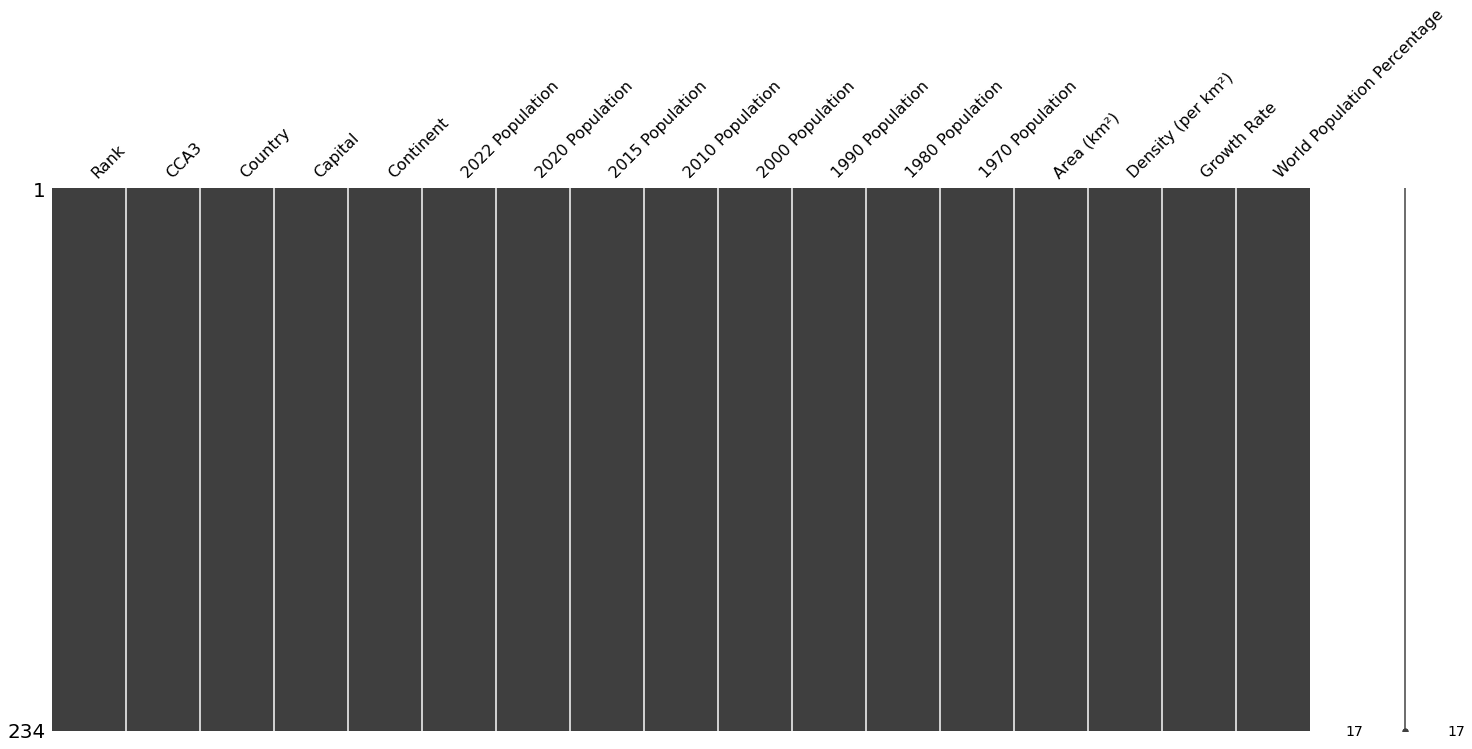

In [13]:
msno.matrix(data)

데이터 클리닝: 결측치 값 해결하는 것

⭐Important Observations :
- 국가 수: 234
- 대륙 수: 6

### EDA

#### Population Analysis Of Continents :

In [16]:
continent_data =  data.groupby('Continent')[features].mean().sort_values(by = "Density (per km²)",ascending = False)
continent_data.style.background_gradient(cmap = "BuGn")

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.560000,94427665.480000,93261730.700000,89165003.640000,84400826.540000,74701792.080000,64211271.540000,52706684.560000,42898125.800000,642762.820000,1025.024136,1.009384,1.183800
Europe,124.500000,14862950.760000,14915843.920000,14830712.160000,14712278.680000,14521868.460000,14406415.940000,13850543.180000,13118479.820000,460208.220000,663.324742,1.002256,0.186600
North America,160.925000,15007403.400000,14855914.825000,14259596.250000,13568016.275000,12151739.600000,10531660.625000,9207334.025000,7885865.150000,606104.450000,272.761758,1.004175,0.187750
Oceania,188.521739,1958198.000000,1910148.956522,1756664.478261,1613163.652174,1357512.086957,1162774.869565,996532.173913,846968.260870,370220.913043,132.543065,1.007383,0.023913
Africa,92.157895,25030367.228070,23871435.263158,21071972.666667,18512773.192982,14367474.245614,11195625.070175,8448006.614035,6411304.350877,531894.087719,125.047646,1.021244,0.313509
South America,97.571429,31201186.285714,30823574.500000,29509599.714286,28077017.857143,24973877.285714,21224743.928571,17270643.285714,13781939.714286,1273813.000000,20.971979,1.007957,0.391429


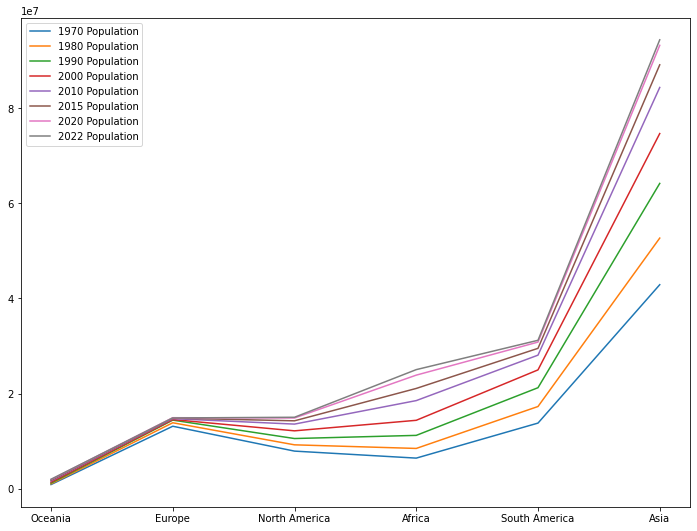

In [18]:
# All continents
continent_data.sort_values(by = '2022 Population', inplace=True)
plt.figure(figsize=(12,9))
population_features = ['2022 Population','2020 Population','2015 Population','2010 Population',
                       '2000 Population','1990 Population','1980 Population','1970 Population']
population_features.reverse()
for feature in population_features:
    plt.plot(continent_data[feature], label=feature)
plt.legend()
plt.show()

#### Population Analysis of Individual Countries :

In this section, we analyse the population of each country. We take help of Chloropleth Maps to visualise data in a very beautiful way.

In [19]:
# 2022 population
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='2022 Population',  # we indicate the year we are interested in
                    hover_name='Country',                    
                    title = '2022 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

NameError: name 'px' is not defined

⭐Important Observations :
* India and China have shown a massive increase in Population having almost 17.77% and 17.88% of the World Population respectively.
* The Growth Rate Of Ukraine is lowest at 0.912 and that of Moldova is highest at 1.0691.
* The Continent of Asia has highest population in every year than others and Oceanic having the lowest of all.
* The Continent of Asia has the highest Density (per km²) and South America the lowest .
* Europe has a very steady population than others.
* African Continent has the overall highest growth rate than other Continents.